# Perceptron (or Neuron) - A recap

- It has four main parameters: input values, weights and Bias, net sum, and an activation function.
- Bias provide an offset (map it to intercept).
- Weight represent impact of each input value.
- Activation function scales the overall output to a predefined range, and add non-linearity overall.
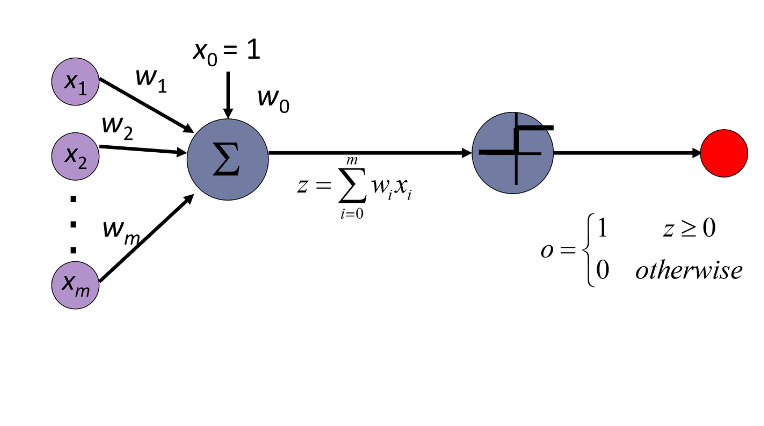


Today's class will be slightly different.

We will be talking about the intuition of RNNs, LSTMs and GRUs first; and then will look at them on a technical level.

## Demystifying the terms



*   Cell: A neuron
*   Cell State: Neuron Output
*   Previous Cell State: Previous Neuron Output
*   Hidden State: Neuron Output if neuron lies in hidden layer
*   Previous Hidden State: Previous Neuron Output if current neuron lies in hidden layer
*   Gates: Mathematics on inputs, hidden neuron outputs, and activation functions


### Sigmoid Function
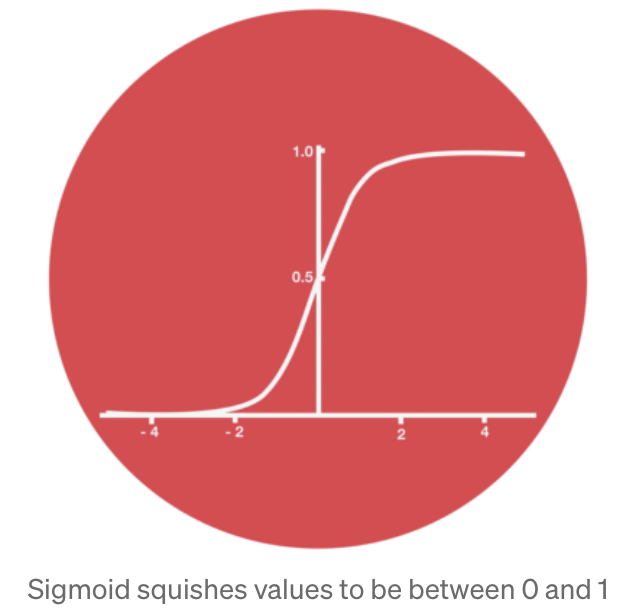

### Tanh Function
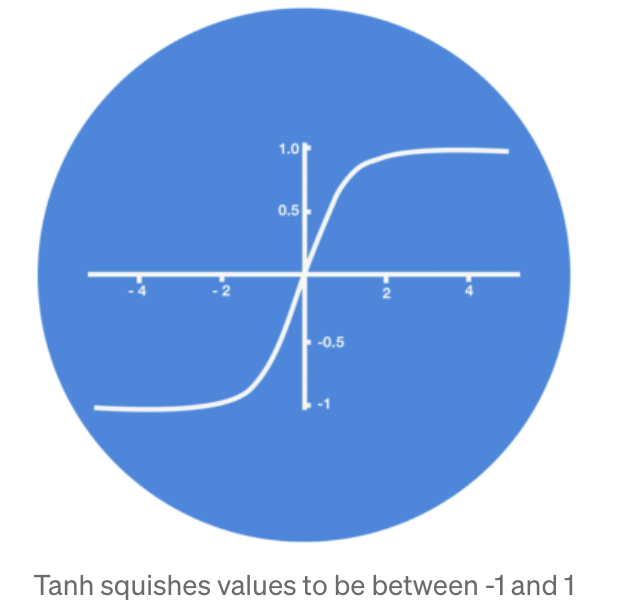

### Pointwise Multiplication

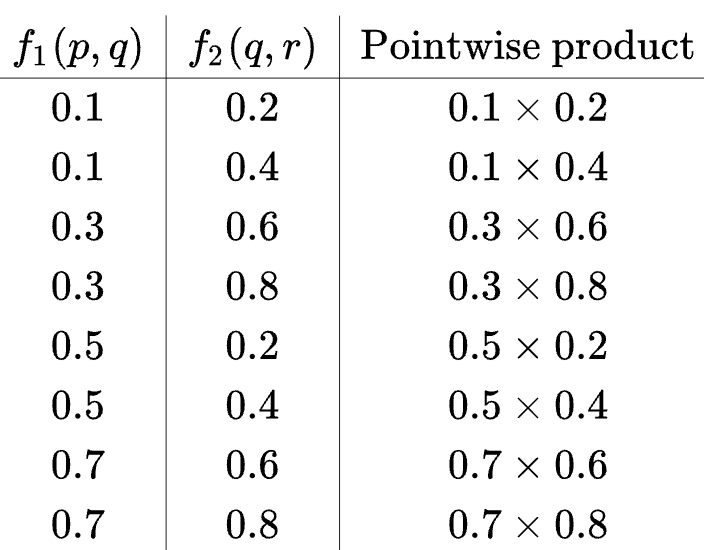

### Pointwise Addition

????

# Homework
What is Backpropagation through time?

https://www.geeksforgeeks.org/ml-back-propagation-through-time/

# The RNN Cell

*The RNN cell is rarely used in the modern era.*


Humans don’t start their thinking from scratch every second. As you read this sentence, you understand each word based on your understanding of previous words. You don’t throw everything away and start thinking from scratch again. Your thoughts have persistence.


Traditional neural networks can’t do this, and it seems like a major shortcoming. For example, imagine you want to classify what kind of event is happening at every point in a movie. It’s unclear how a traditional neural network could use its reasoning about previous events in the film to inform later ones.

Recurrent neural networks address this issue. They are networks with loops in them, allowing information to persist.

## Recurrent Neural Networks have loops


> > 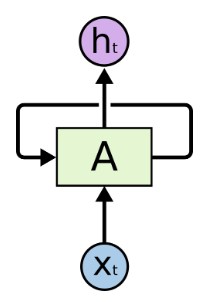






In the above diagram, a chunk of neural network, ``` A ```, looks at some input ``` xt ``` and outputs a value ``` ht ```. A loop allows information to be passed from one step of the network to the next.

These loops make recurrent neural networks seem kind of mysterious. However, if you think a bit more, it turns out that they aren’t all that different than a normal neural network. A recurrent neural network can be thought of as multiple copies of the same network, each passing a message to a successor. Consider what happens if we unroll the loop:

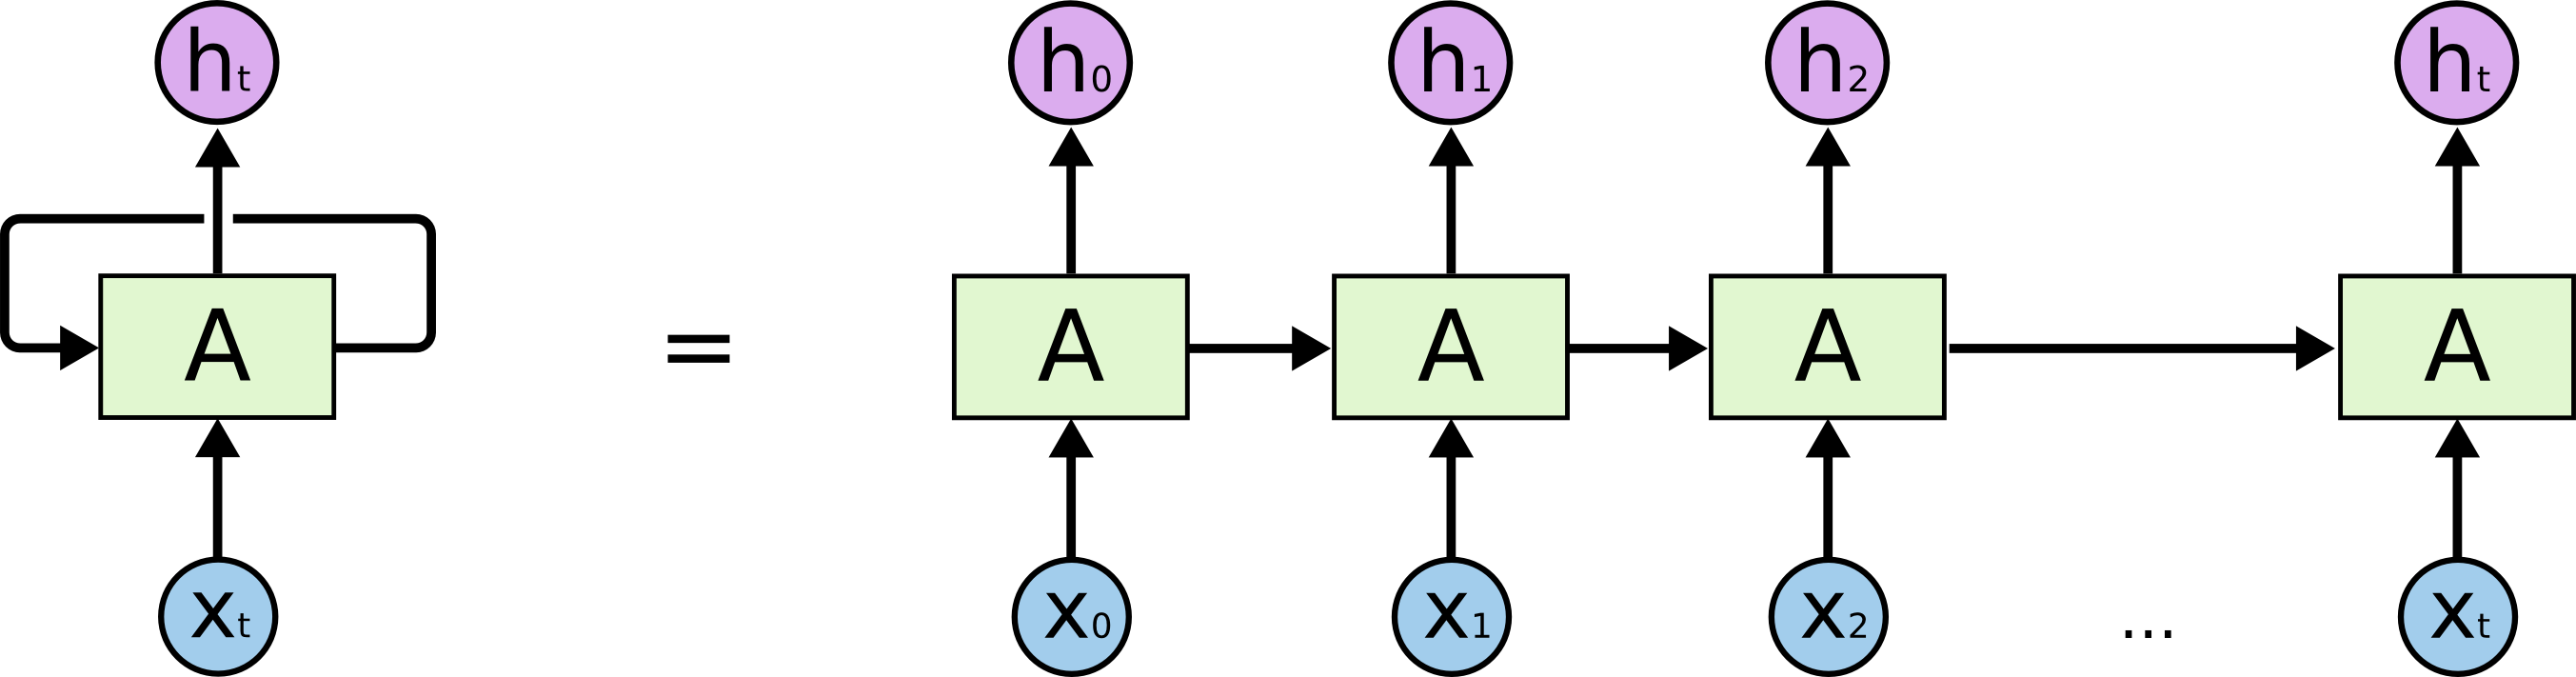

This chain-like nature reveals that recurrent neural networks are intimately related to sequences and lists. They’re the natural architecture of neural network to use for such data.

In the last few years, there have been incredible success applying RNNs to a variety of problems: speech recognition, language modeling, translation, image captioning… The list goes on. I’ll leave discussion of the amazing feats one can achieve with RNNs to Andrej Karpathy’s excellent blog post, [The Unreasonable Effectiveness of Recurrent Neural Networks](https://karpathy.github.io/2015/05/21/rnn-effectiveness/).

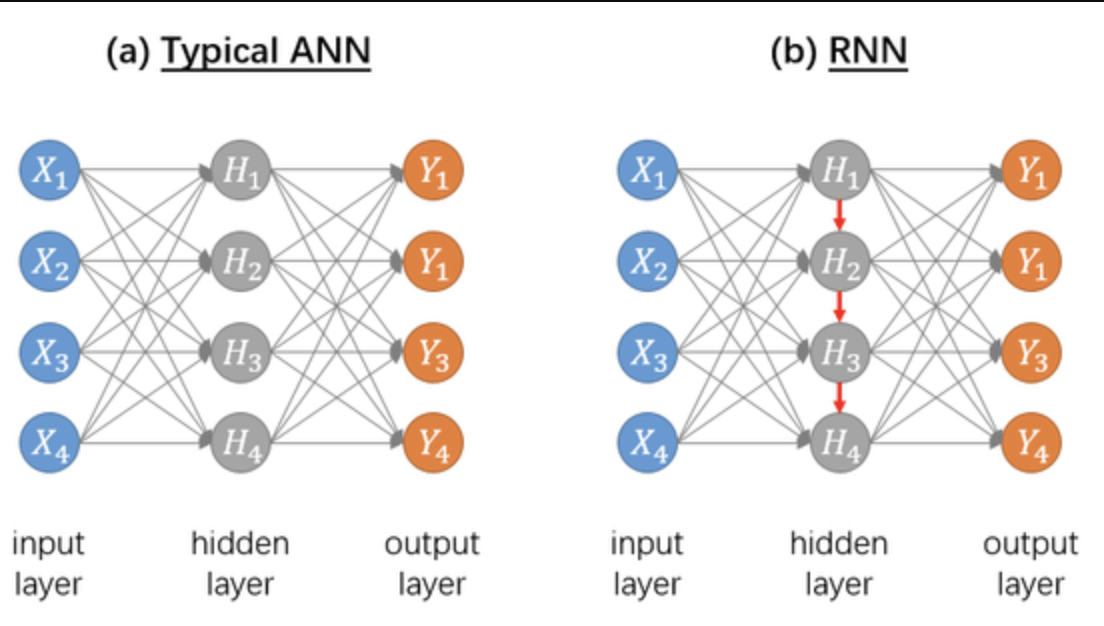

## The Problem of Long-Term Dependencies


One of the appeals of RNNs is the idea that they might be able to connect previous information to the present task, such as using previous video frames might inform the understanding of the present frame.

If RNNs could do this, they’d be extremely useful. But can they? It depends.

Sometimes, we only need to look at recent information to perform the present task. For example, consider a language model trying to predict the next word based on the previous ones.

If we are trying to predict the last word in “the clouds are in the sky,” we don’t need any further context – it’s pretty obvious the next word is going to be sky. In such cases, where the gap between the relevant information and the place that it’s needed is small, RNNs can learn to use the past information.



---




But there are also cases where we need more context. Consider trying to predict the last word in the text “I grew up in France… I speak fluent French.” Recent information suggests that the next word is probably the name of a language, but if we want to narrow down which language, we need the context of France, from further back. It’s entirely possible for the gap between the relevant information and the point where it is needed to become very large.

Unfortunately, as that gap grows, RNNs become unable to learn to connect the information.

In theory, RNNs are absolutely capable of handling such “long-term dependencies.” A human could carefully pick parameters for them to solve toy problems of this form. Sadly, in practice, RNNs don’t seem to be able to learn them. The problem was explored in depth by Hochreiter (1991) and Bengio, et al. (1994), who found some pretty fundamental reasons why it might be difficult.

***Thankfully, LSTMs don’t have this problem!***

# The LSTM Cell


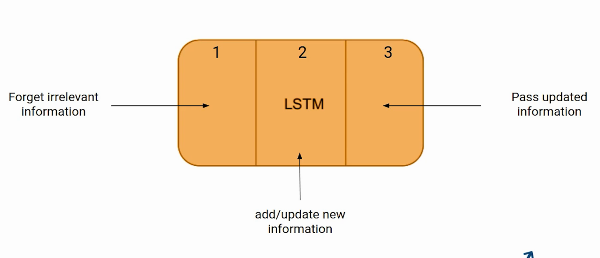

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work. They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

Remember: All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.


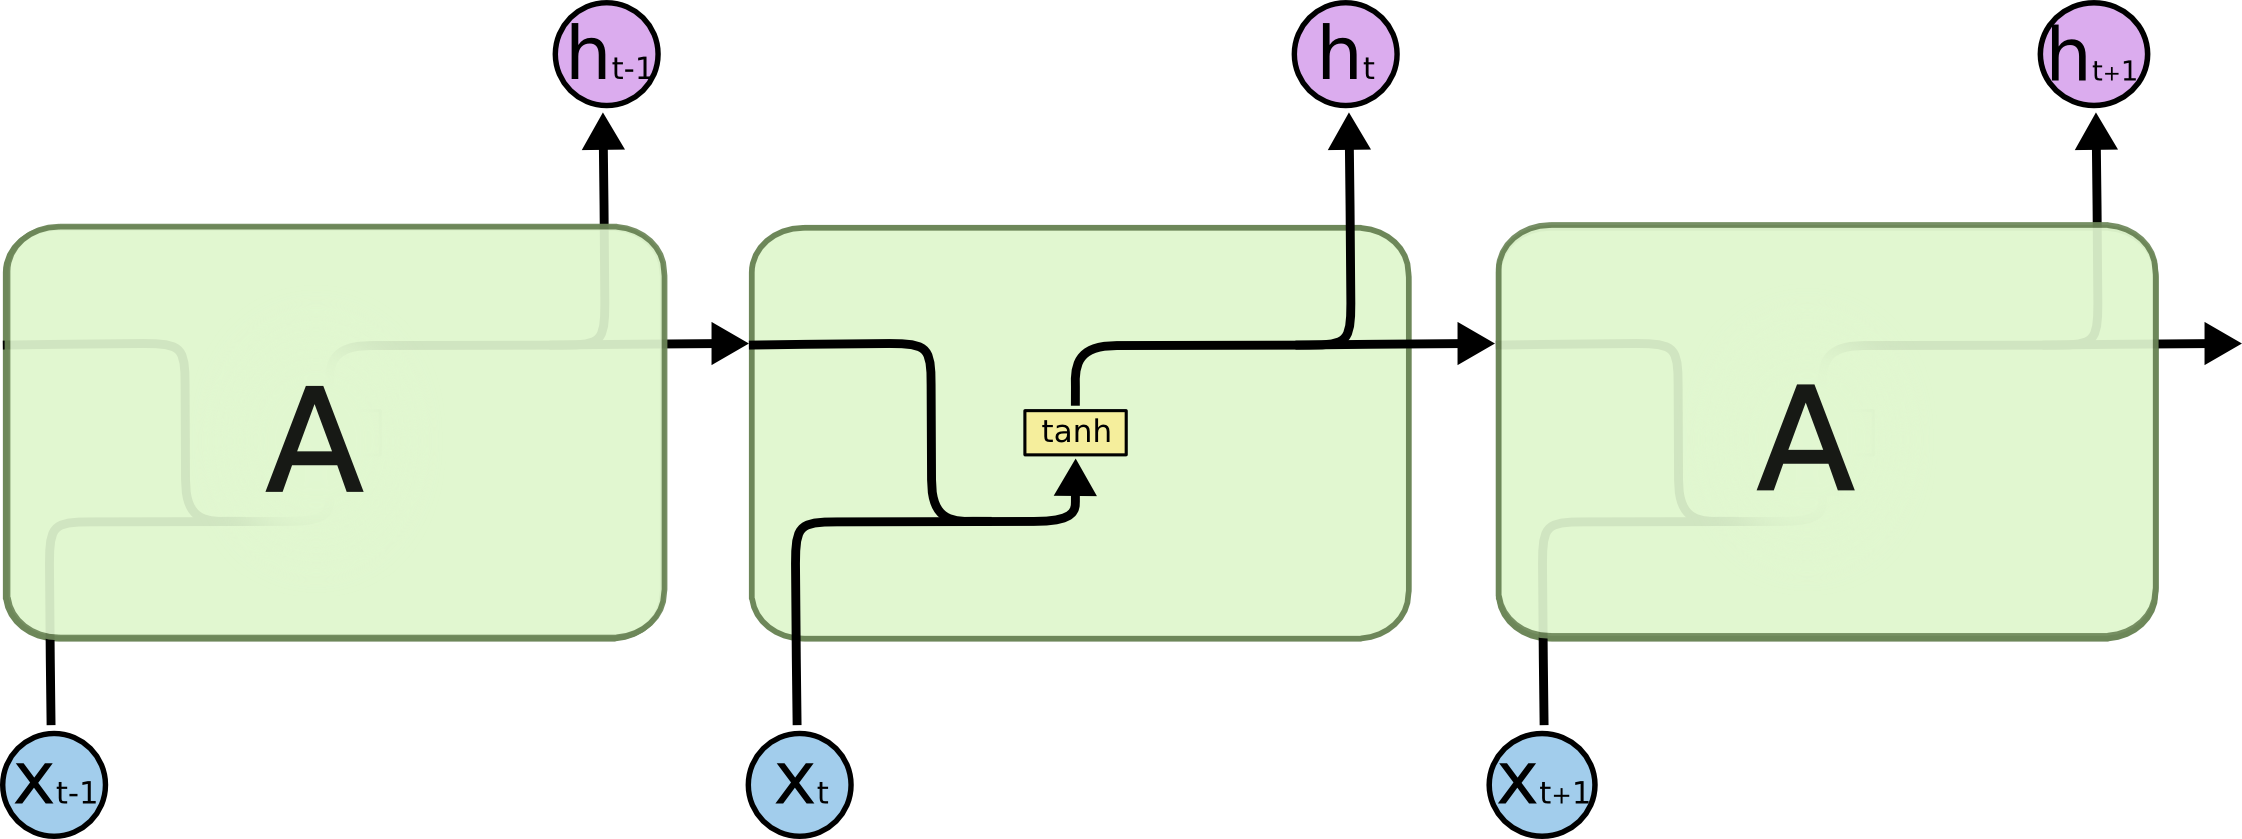

LSTMs also have this chain like structure, but the repeating module has a different structure. Instead of having a single neural network layer, there are four, interacting in a very special way.

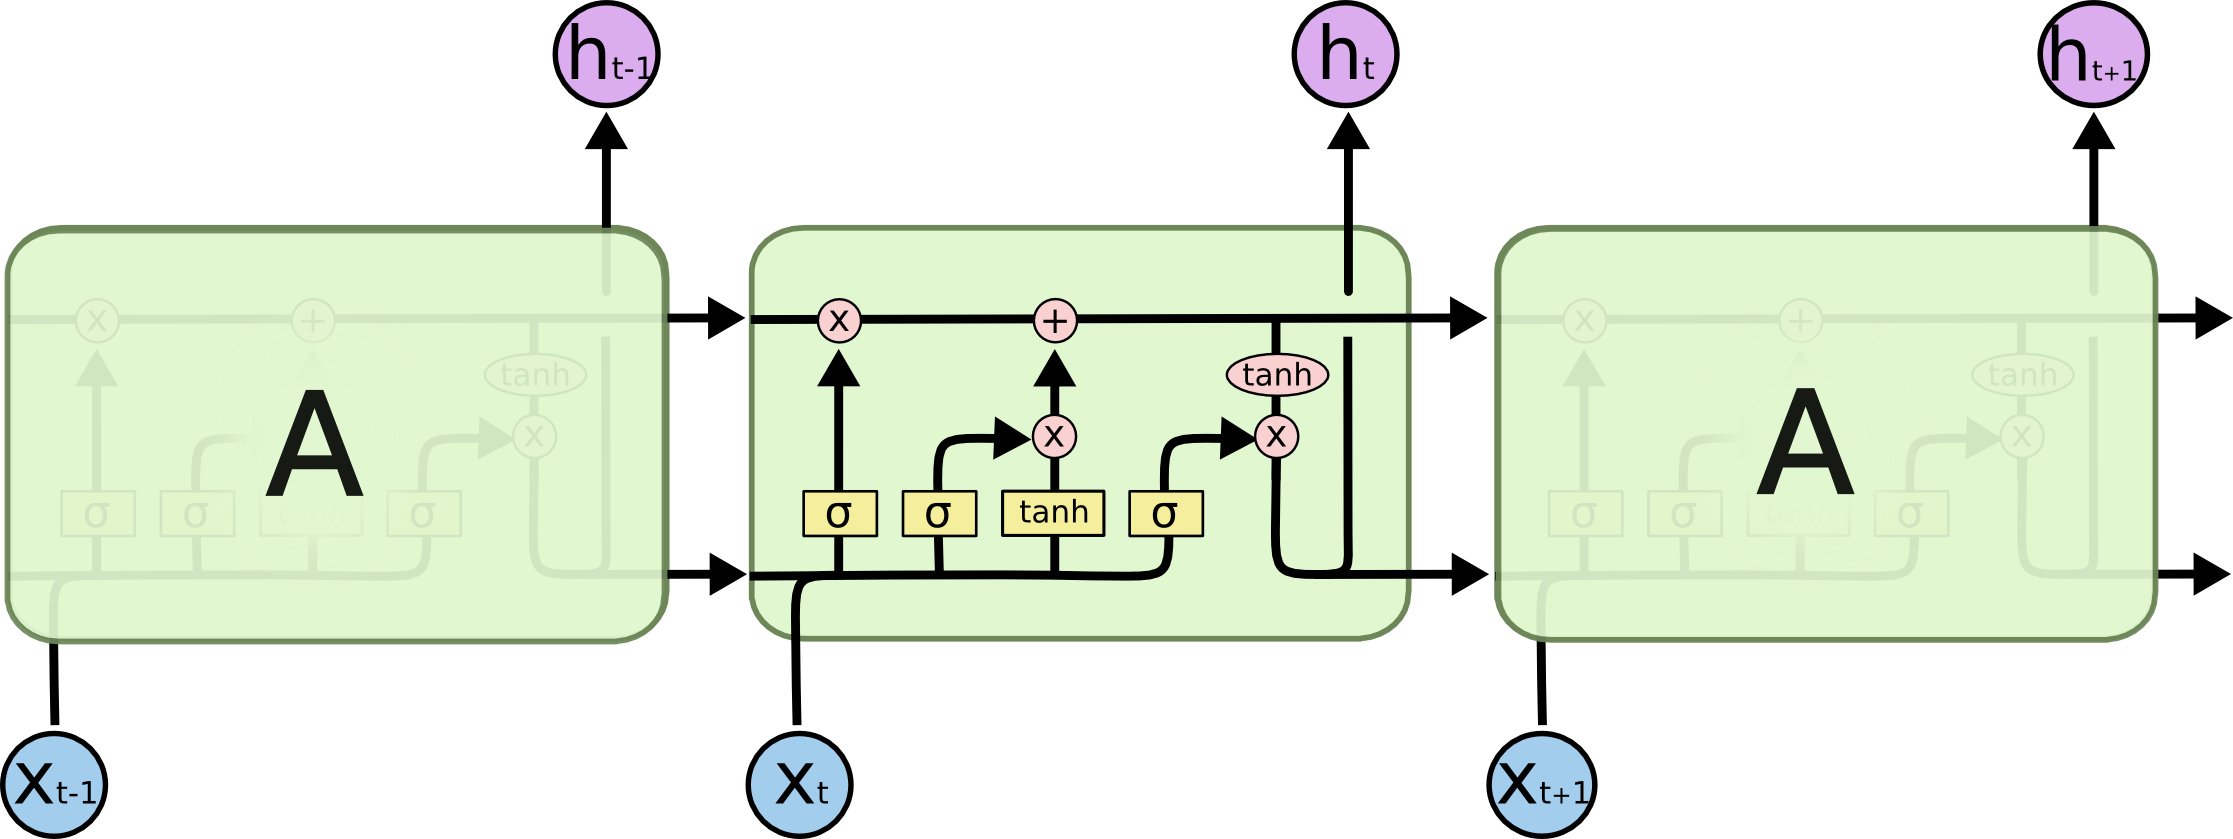

## LSTM Cell Technical Architecture

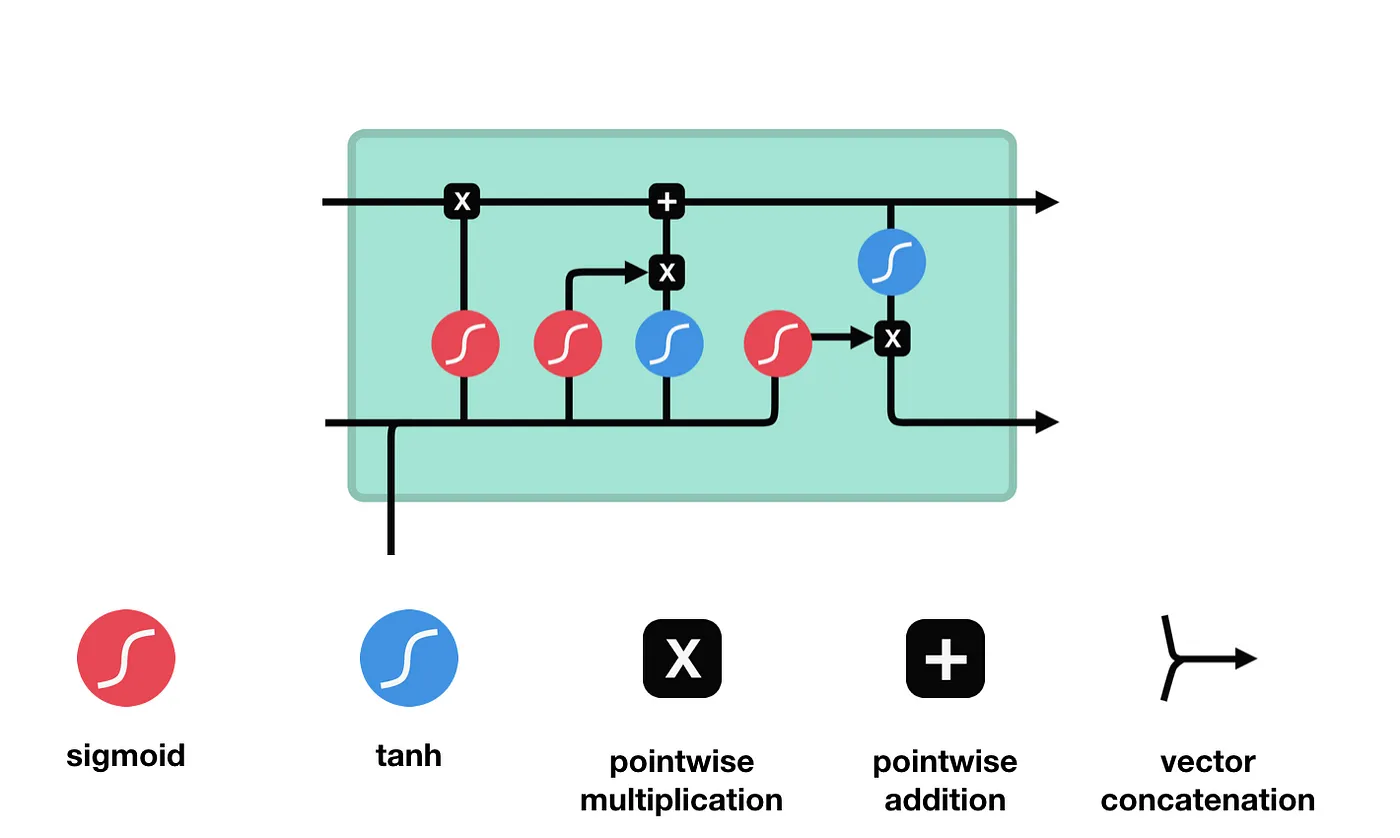

These operations are used to allow the LSTM to keep or forget information. Now looking at these operations can get a little overwhelming so we’ll go over this step by step.

## LSTM Cell: Step by Step

### Cell State

**The key to LSTMs is the cell state, the horizontal line running through the top of the diagram.**

The cell state is kind of like a conveyor belt. It runs straight down the entire chain, with only some minor linear interactions. It’s very easy for information to just flow along it unchanged.

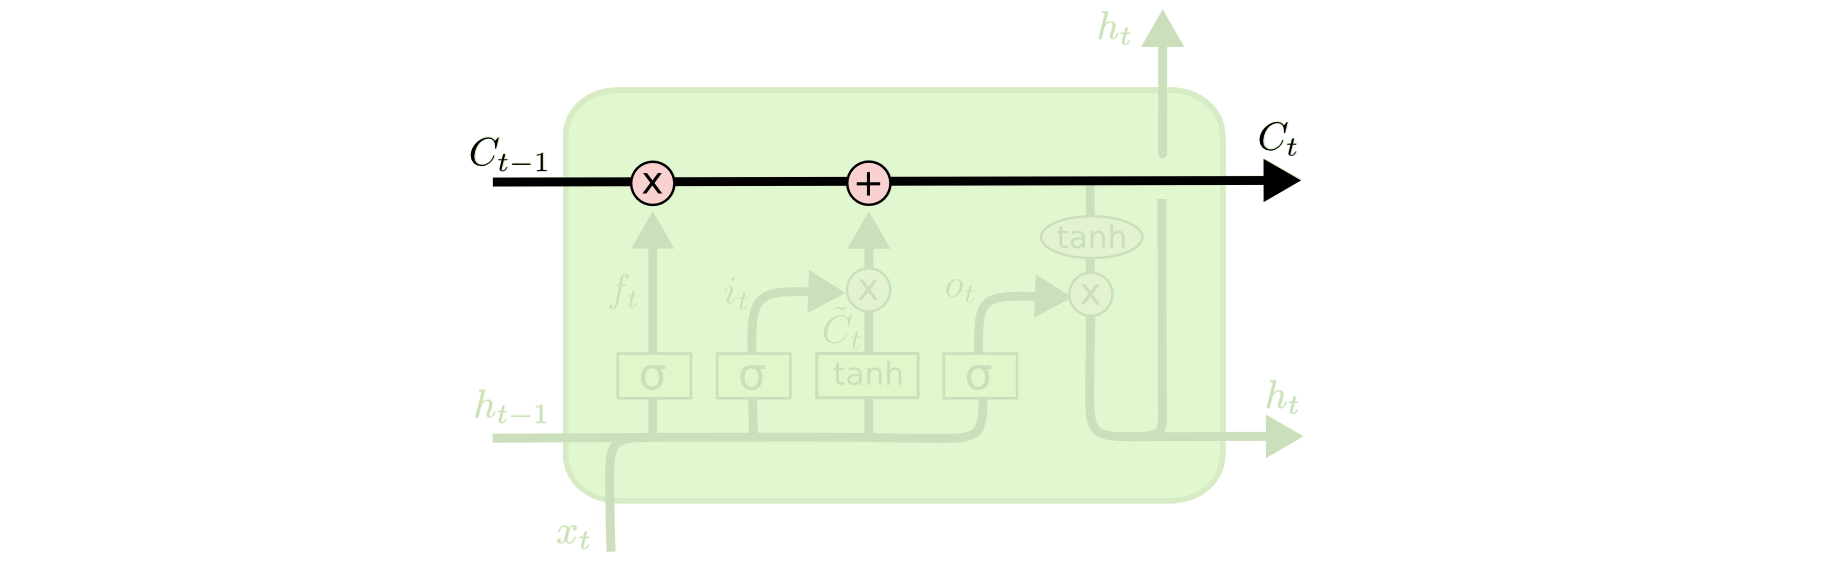

The LSTM does have the ability to remove or add information to the cell state, carefully regulated by structures called gates.

An LSTM has three of these gates, to protect and control the cell state.



### Forget Gate

The first step in our LSTM is to decide what information we’re going to throw away from the cell state. This decision is made by a sigmoid layer called the “forget gate layer.” It looks at ht−1 and xt, and outputs a number between 0 and 1 for each number in the cell state Ct−1.

A 1 represents “completely keep this” while a 0 represents “completely get rid of this."

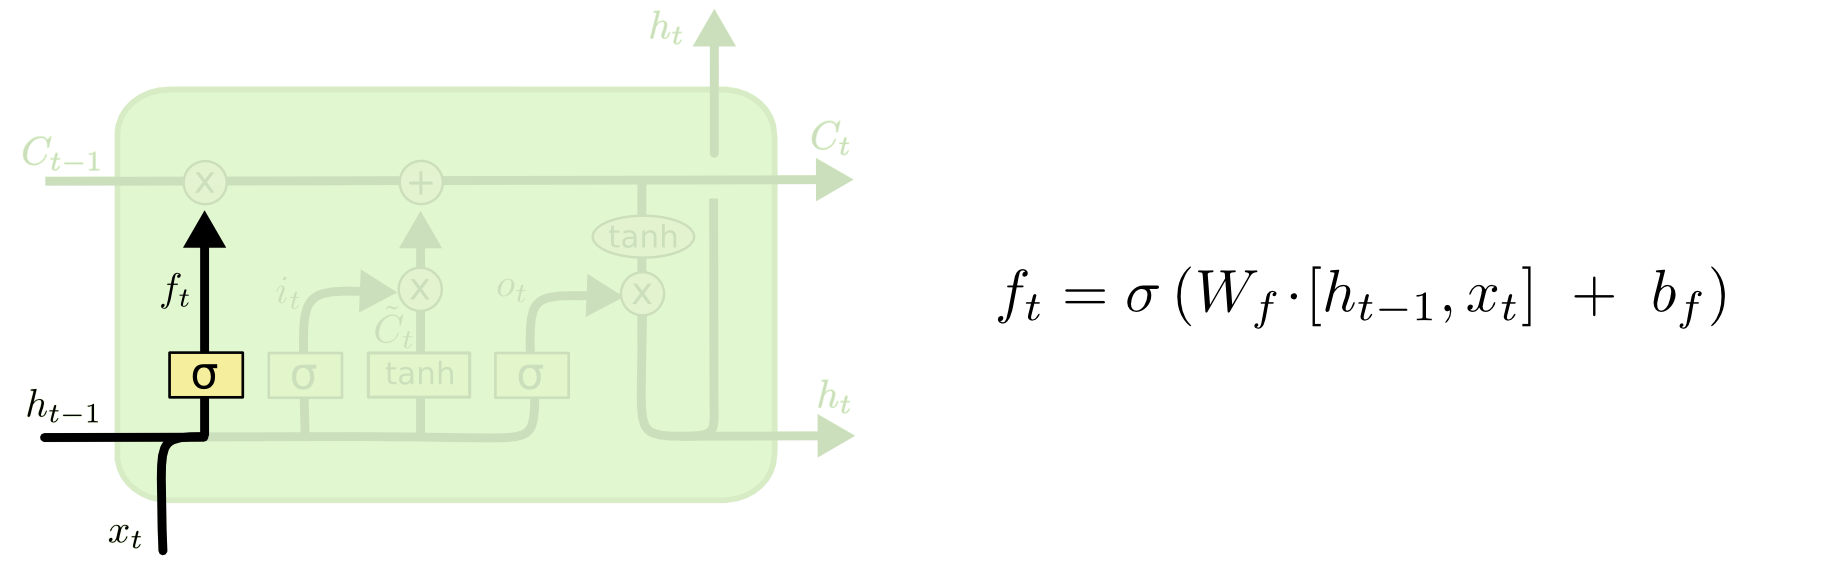

### Input Gate

The next step is to decide what new information we’re going to store in the cell state. This has two parts. First, a sigmoid layer called the “input gate layer” decides which values we’ll update. Next, a tanh layer creates a vector of new candidate values, C̃ t, that could be added to the state. In the next step, we’ll combine these two to create an update to the state.

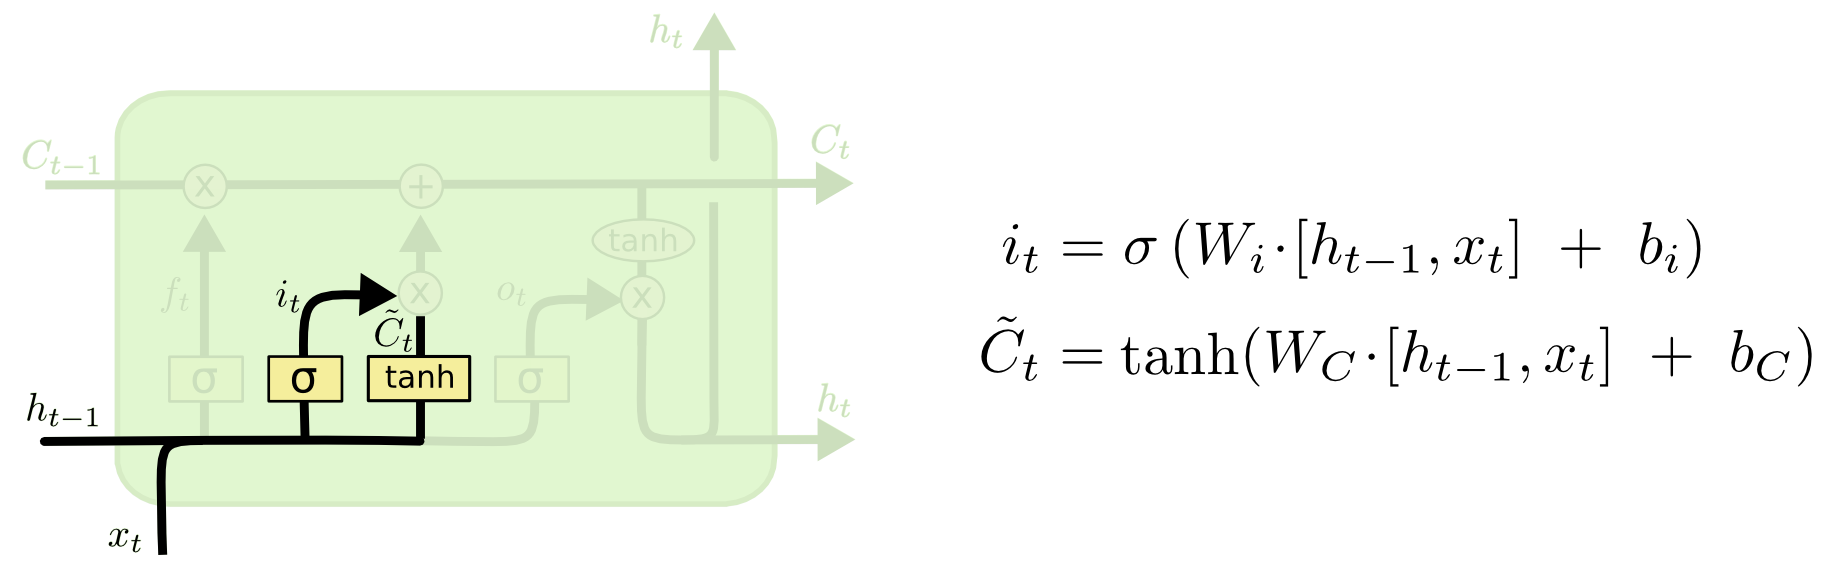

### Cell State Update
It’s now time to update the old cell state, Ct−1, into the new cell state Ct
. The previous steps already decided what to do, we just need to actually do it.

We multiply the old state by ft, forgetting the things we decided to forget earlier. Then we add it∗C̃ t. This is the new candidate values, scaled by how much we decided to update each state value.

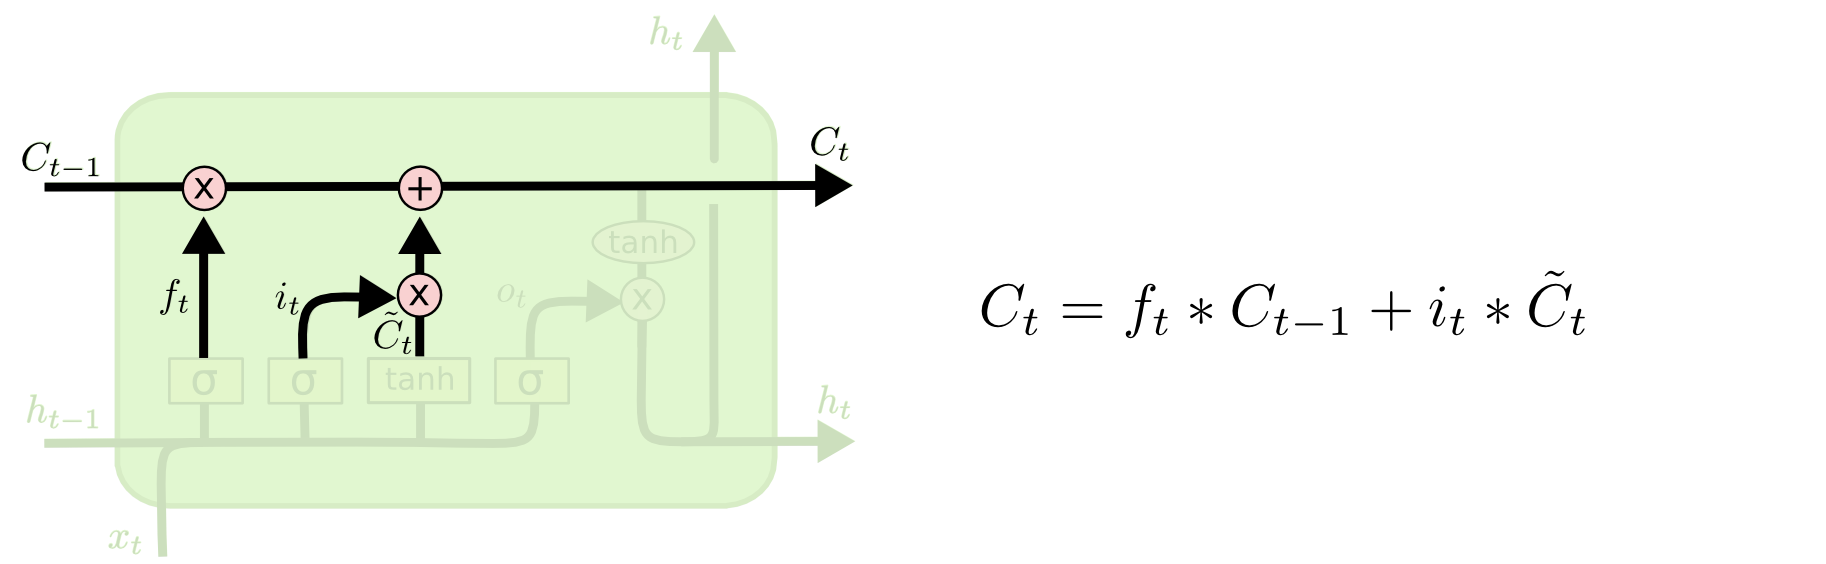

### Output Gate

Finally, we need to decide what we’re going to output. This output will be based on our cell state, but will be a filtered version. First, we run a sigmoid layer which decides what parts of the cell state we’re going to output. Then, we put the cell state through tanh (to push the values to be between −1 and 1) and multiply it by the output of the sigmoid gate, so that we only output the parts we decided to.

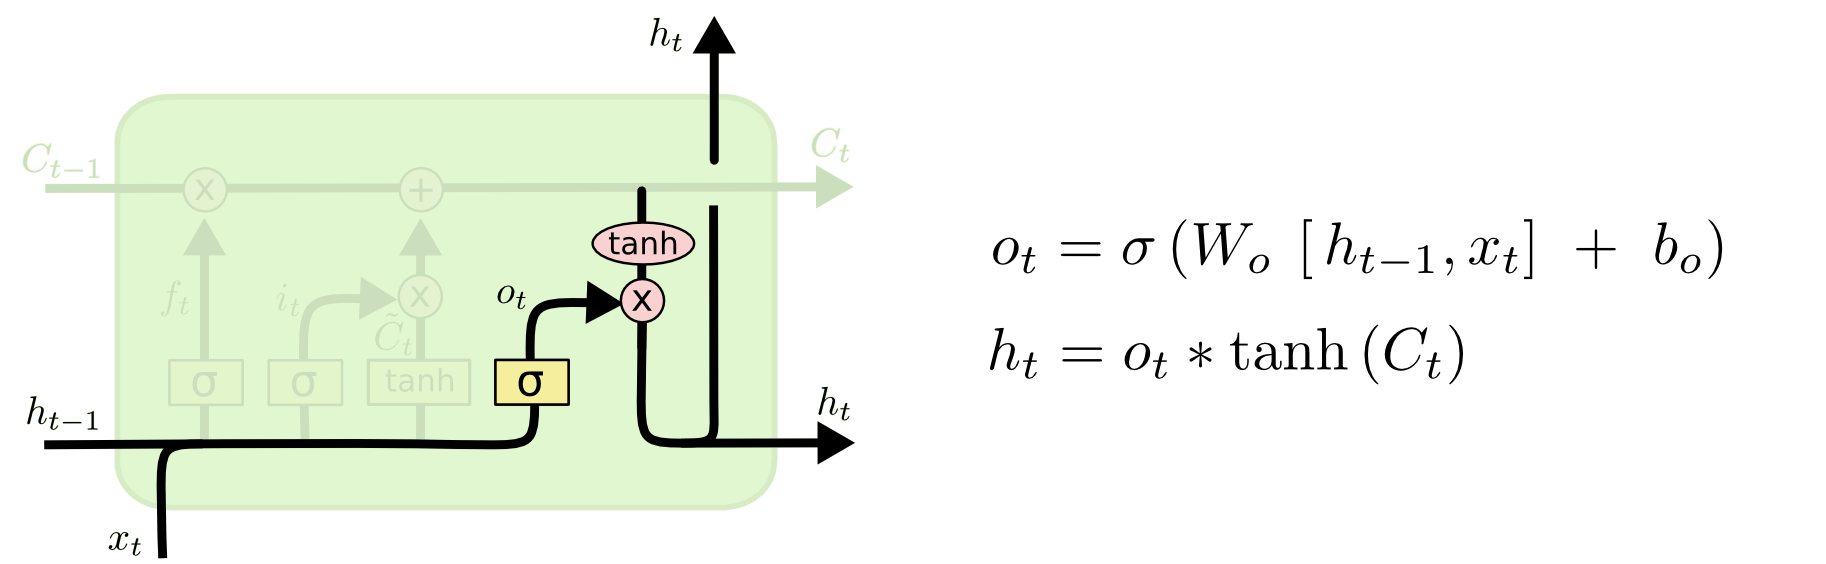

### Finally

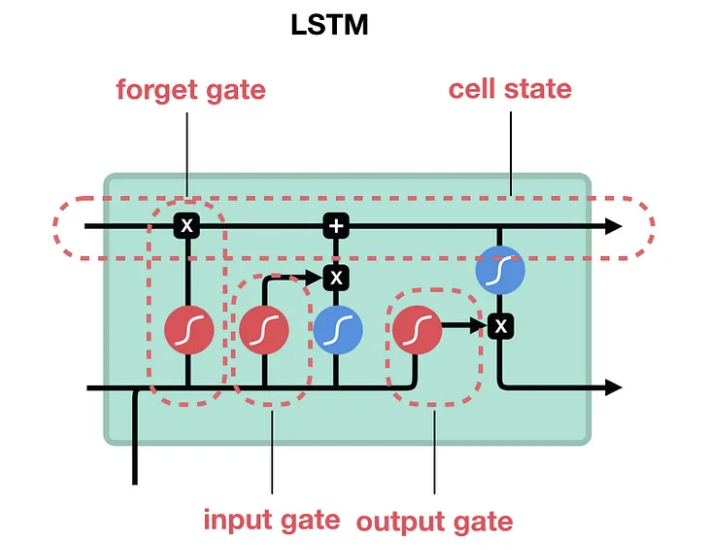

# GRU Cell

A slightly more dramatic variation on the LSTM is the Gated Recurrent Unit, or GRU, introduced by Cho, et al. (2014). It combines the forget and input gates into a single “update gate.” It also merges the cell state and hidden state, and makes some other changes. The resulting model is simpler than standard LSTM models, and has been growing increasingly popular.


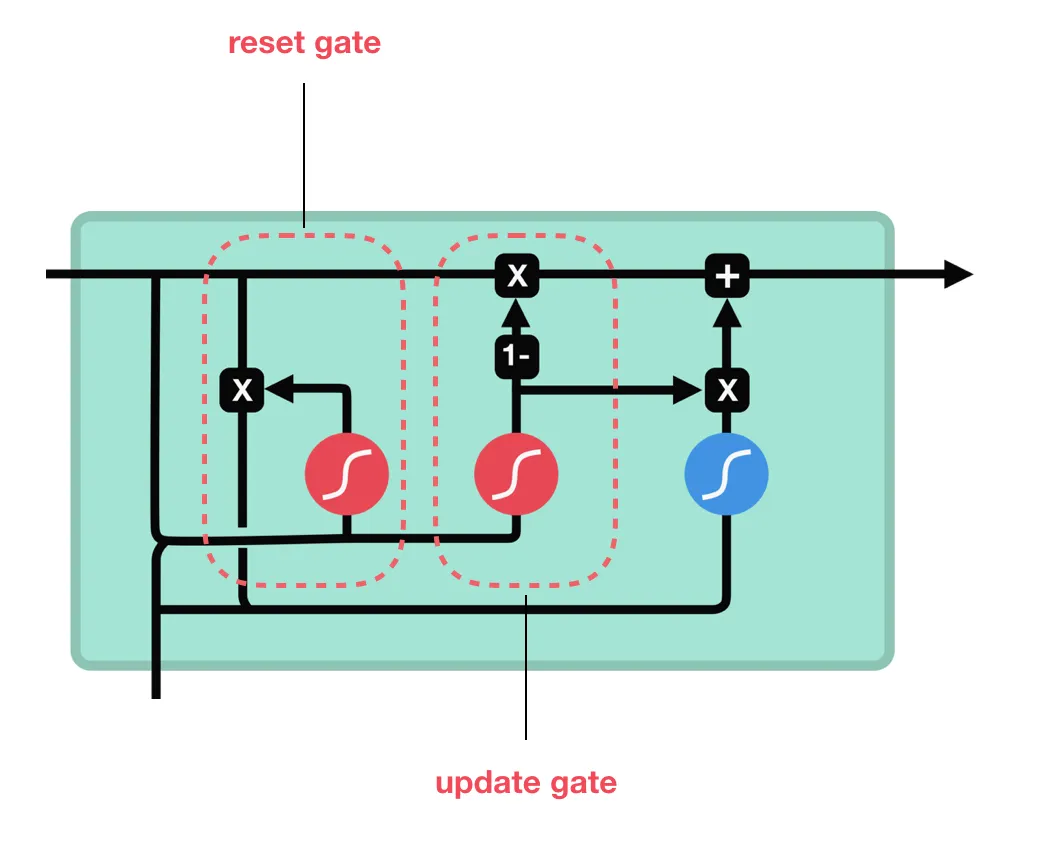

### Update Gate
The update gate acts similar to the forget and input gate of an LSTM. It decides what information to throw away and what new information to add.

### Reset Gate
The reset gate is another gate is used to decide how much past information to forget.

In [ ]:
# https://keras.io/examples/
"""
Title: Bidirectional LSTM on IMDB
Author: [fchollet](https://twitter.com/fchollet)
Date created: 2020/05/03
Last modified: 2020/05/03
Description: Train a 2-layer bidirectional LSTM on the IMDB movie review sentiment classification dataset.
Accelerator: GPU
"""
"""
## Setup
"""

import numpy as np
import keras
from keras import layers

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

"""
## Build the model
"""

# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

"""
## Load the IMDB movie review sentiment data
"""

(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
# Use pad_sequence to standardize sequence length:
# this will truncate sequences longer than 200 words and zero-pad sequences shorter than 200 words.
x_train = keras.utils.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.utils.pad_sequences(x_val, maxlen=maxlen)

"""
## Train and evaluate the model

You can use the trained model hosted on [Hugging Face Hub](https://huggingface.co/keras-io/bidirectional-lstm-imdb)
and try the demo on [Hugging Face Spaces](https://huggingface.co/spaces/keras-io/bidirectional_lstm_imdb).
"""

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 bidirectional (Bidirection  (None, None, 128)         98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2757761 (10.52 MB)
Trainable params: 2757761 (1